In [1]:
from collections import Iterable
from typing import Union, Tuple

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plotter

c:\users\dmitry\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  """Entry point for launching an IPython kernel.


In [2]:
# deflaut ode function
def ode(vector_y: [float], t_time: float, b: float, c: float) -> [float]:
    """
    function of implemented ODE
    Args:
        vector_y(vector of floats): state variable vector
        t_time(float): time argument
        b(float): parameter of ODE
        c(float): second param of ODE
    Returns:
        vector of derivative
    """
    theta, omega = vector_y
    dy_dt = [omega, -b * omega - c * np.exp(theta) * t_time / c * b]
    return dy_dt



In [3]:
def calculate_ode(ode_func, vector_args: [float], recalc_y0_: float, dy0, t_solve: int = 10, num_steps: int = 101) \
        -> Tuple[Union[np.ndarray, Iterable, int, float], dict]:
    """
        def that calculates ode (numeric calculation)
        Args:
            ode_func(lambda/func/meth) -> [float]
            vector_args(vector of floats): arguments that need to call ODE
            recalc_y0_(float): initial state of first parameter y
            dy0(float): initial state of the second parameter (derivative of second param)
            t_solve(int): len of solve
            num_steps(float): number of steps (need to accuracy)
        Returns:
            vector of derivative(vector of floats)
            OR in PyNamespaces Tuple[Union[np.ndarray, Iterable, int, float], dict]
        """
    recalc_y0_ = [recalc_y0_, dy0]
    t = np.linspace(0, t_solve, num_steps)
    _ode_solve_r = odeint(ode_func, recalc_y0_, t, vector_args)
    return _ode_solve_r

In [9]:
def v_render_phase_portrait(ode_func, vector_args: [float], delta_x: int = 1, delta_dx: int = 1,
                            start_x: int = 0, end_x: int = 5, start_dx: int = 0, end_dx: int = 5,
                            t_solve: int = 10, num_steps: int = 101):
    """
        def that plot ode portrait
        Args:
            ode_func(lambda/func/meth) -> [float]
            vector_args(vector of floats): arguments that need to call ODE
            delta_x (int): step of initial variable in horizontal axis (statement variable)
            delta_dx (int): step of initial variable in horizontal axis (statement variable)
            start_x (int): initial statement of interval of start params
            end_x (int): ending statement of interval of start params
            start_dx (int): initial statement of interval of start params (derivation of param)
            end_dx (int): ending statement of interval of start params (derivation of param)
            t_solve(int): len of solve
            num_steps(float): number of steps (need to accuracy)
        Returns:
            vector of derivative(vector of floats)
            OR in PyNamespaces Tuple[Union[np.ndarray, Iterable, int, float], dict]
    """
    for val_tuple in range(start_x, end_x, delta_x):  # values of y0
        for derivation_typ in range(start_dx, end_dx, delta_dx):   # values of dy0
            sol = calculate_ode(ode_func, vector_args, val_tuple, derivation_typ, t_solve, num_steps)
            plotter.plot(sol[:, 1], sol[:, 0], 'b')
    plotter.xlabel('x')
    plotter.ylabel('dx/dt')
    plotter.grid()
    plotter.show()

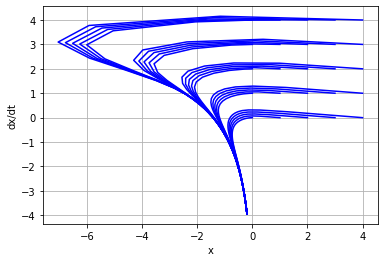

In [10]:
_args = (11, 55)
v_render_phase_portrait(ode, _args)

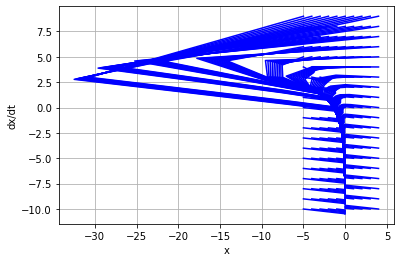

In [16]:
v_render_phase_portrait(ode, _args,1, 1, -10, 10, -5, 5, 45, 301)

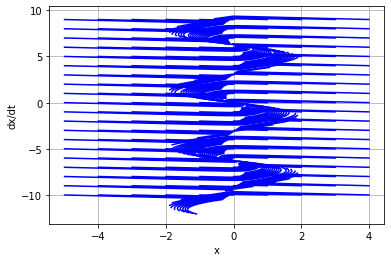

In [25]:
v_render_phase_portrait(lambda vector_y, t_time, b, c: 
                            [vector_y[1], -b * vector_y[1] - c * np.sin(vector_y[0]) * t_time / c * b],
                                _args,1, 1, -10, 10, -5, 5, 2, 100)

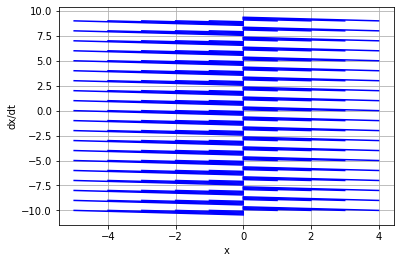

In [33]:
v_render_phase_portrait(lambda vector_y, t_time, b, c: 
                            [vector_y[1], -b * vector_y[1] - c * np.sin(vector_y[1])/b * t_time / c * b],
                                _args,1, 1, -10, 10, -5, 5, 2, 4000)